##SUPERMARKET SALES ANALYSIS

Importando librerias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import numpy

Variables Globales

In [3]:
global df_ventas
global df_ventas_limpio

*Importando la Base de Datos .csv*

In [4]:
def obtencion_datos():
    global df_ventas
    df_ventas = pd.read_csv('reporte_ventas.csv', sep = ',')
obtencion_datos()

Normalización y limpieza de los datos

In [5]:
#Formateamos el tipo de dato de las fechas a uno adecuado
df_ventas['fecha_pedido'] = pd.to_datetime(df_ventas['fecha_pedido'], format='%Y-%m-%d')
df_ventas['fecha_envio'] = pd.to_datetime(df_ventas['fecha_envio'], format='%Y-%m-%d')

#Eliminar repetidos
df_ventas_limpio = df_ventas.drop_duplicates()

#eliminamos registros de prueba
def eliminar_registros_prueba(df):
  return df.drop(df[df['nombre_cliente'] == 'prueba'].index)
df_ventas_limpio = eliminar_registros_prueba(df_ventas_limpio)

#reiniciamos el index
df_ventas_limpio.reset_index(inplace=True)
df_ventas_limpio.drop(columns=['index'], inplace=True)

#Reemplazamos los nombres de clientes NaN por el valor "missing"
df_ventas_limpio['nombre_cliente'].fillna('missing', inplace=True)


1. ¿Cuáles son las ventas totales por año? ¿Y qué año tuvo mejor desempeño? (Pablo)

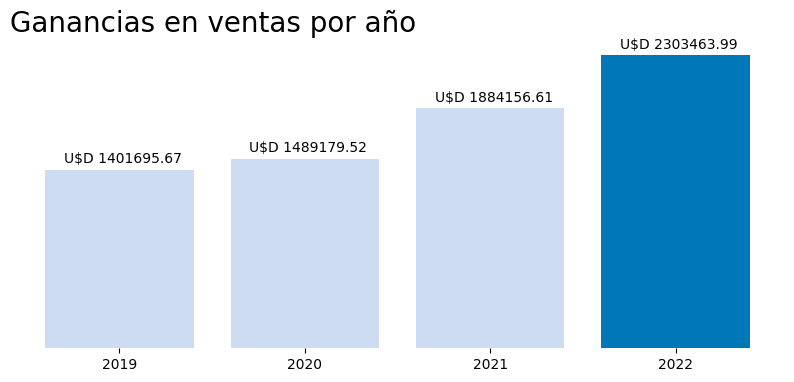

In [12]:
#Code here
def pregunta_1():
  df_ventas_ano = df_ventas_limpio[['fecha_pedido', 'total_venta']].copy()
  df_ventas_ano['año'] = df_ventas_ano['fecha_pedido'].dt.year
  df_ventas_ano.drop('fecha_pedido', axis=1, inplace=True)
  df_ventas_ano = df_ventas_ano.groupby('año').aggregate('sum')
  df_ventas_ano

  fig, ax = plt.subplots(figsize=(10,4))
  x = df_ventas_ano.index
  y = df_ventas_ano['total_venta']
  ax.bar(x,y, width=0.8, color=['#CDDBF3','#CDDBF3','#CDDBF3','#0077b6'])
  plt.xticks([2019, 2020, 2021, 2022])
  plt.box(False)
  plt.gca().yaxis.set_visible(False)
  plt.title('Ganancias en ventas por año', loc='left', fontsize=20)

  for bar in ax.patches:
    x = bar.get_x() + 0.1
    y = bar.get_height()
    valor = f'U$D {y}'
    y_position = y + 50000
    ax.text(x,y_position,valor)

pregunta_1()


2. ¿Cuáles son los 7 productos que más ganancias mostraron durante todo el periodo?

In [ ]:
#Code here
df_ventas_limpio

3. ¿Si separamos las ventas totales por año y por regiones ¿Qué insight podemos obtener de nuestras ventas? (Jhojan)

In [ ]:
#Code here
df_ventas_limpio

4. ¿Cuál es el método de envío más utilizado por los clientes del Supermercado? ¿Es proporcional para B2B y B2C?

In [ ]:
#Code here
df_ventas_limpio

5. ¿Cuáles son las ventas totales por trimestre en el estado de Sao Paulo? (Everardo)

In [ ]:
#Code here
df_ventas_limpio

6. ¿Existe otro insight que puedas proporcionar?

In [ ]:
#Code here
df_ventas_limpio